In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf




In [2]:
import keras as k 

In [3]:
from tensorflow.keras.models import Sequential 

In [4]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [5]:
import pandas as pd


In [6]:
mydata = pd.read_csv("/Users/namanjain/Desktop/ML/SparkathonData - Sheet1.csv")


In [7]:
mydata

,Temperatire,Humidity,Shelf life,Unnamed: 3
0,25.6,80,8.5,NaN
1,12.5,65,8.0,NaN
2,11.0,75,9.5,NaN
3,29.0,85,6.0,NaN
4,5.0,90,13.0,NaN
...,...,...,...,...
72,6.0,75,6.0,NaN
73,28.0,60,6.0,NaN
74,28.0,70,7.0,NaN
75,15.0,70,7.0,NaN


In [8]:
x = mydata.iloc[:, :-1]

In [9]:
y=mydata.iloc[ : , -1]

In [10]:
x,y

(    Temperatire  Humidity  Shelf life
 0          25.6        80         8.5
 1          12.5        65         8.0
 2          11.0        75         9.5
 3          29.0        85         6.0
 4           5.0        90        13.0
 ..          ...       ...         ...
 72          6.0        75         6.0
 73         28.0        60         6.0
 74         28.0        70         7.0
 75         15.0        70         7.0
 76         27.5        70         7.0
 
 [77 rows x 3 columns],
 0    NaN
 1    NaN
 2    NaN
 3    NaN
 4    NaN
       ..
 72   NaN
 73   NaN
 74   NaN
 75   NaN
 76   NaN
 Name: Unnamed: 3, Length: 77, dtype: float64)

In [11]:
x=mydata.iloc[: , :-2]
y=mydata.iloc[: , -2]

In [12]:
x,y

(    Temperatire  Humidity
 0          25.6        80
 1          12.5        65
 2          11.0        75
 3          29.0        85
 4           5.0        90
 ..          ...       ...
 72          6.0        75
 73         28.0        60
 74         28.0        70
 75         15.0        70
 76         27.5        70
 
 [77 rows x 2 columns],
 0      8.5
 1      8.0
 2      9.5
 3      6.0
 4     13.0
       ... 
 72     6.0
 73     6.0
 74     7.0
 75     7.0
 76     7.0
 Name: Shelf life, Length: 77, dtype: float64)

In [13]:
print(x.head())
print(y.head())

   Temperatire  Humidity
0         25.6        80
1         12.5        65
2         11.0        75
3         29.0        85
4          5.0        90
0     8.5
1     8.0
2     9.5
3     6.0
4    13.0
Name: Shelf life, dtype: float64


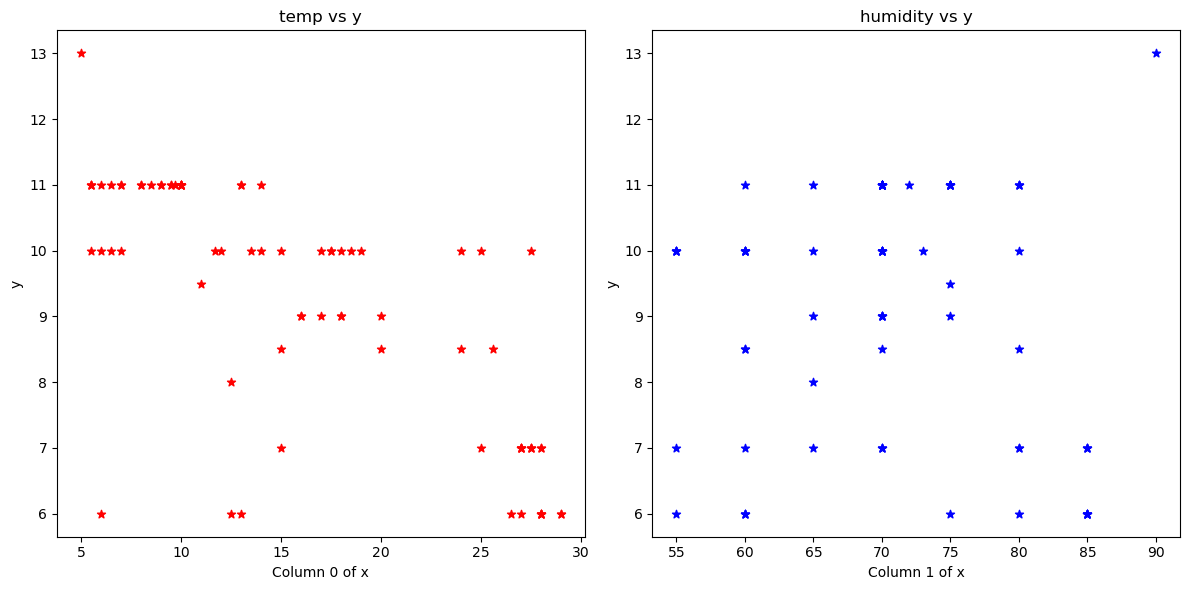

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x.iloc[:, 0], y, marker='*', color='r')
plt.xlabel('Column 0 of x')
plt.ylabel('y')
plt.title('temp vs y')

plt.subplot(1, 2, 2)
plt.scatter(x.iloc[:, 1], y, marker='*', color='b')
plt.xlabel('Column 1 of x')
plt.ylabel('y')
plt.title('humidity vs y')

plt.tight_layout()
plt.show()

In [15]:
X_train, X_, y_train, y_ = train_test_split(x,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (38, 2) X_cv.shape: (31, 2) X_test.shape: (8, 2)


In [16]:
# def eval_cat_err(y, yhat):
#     """ 
#     Calculate the mean squared error on a data set.
#     Args:
#       y    : (ndarray  Shape (m,) or (m,1))  target value of each example
#       yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
#     Returns:
#       err: (scalar)             
#     """
#     m = len(y)
#     err = 0.0
#     for i in range(m):
#     ### START CODE HERE ### 
#       try:
#         err += (yhat[i] - y[i]) ** 2
#       except KeyError as e:
#         print(f"KeyError at index {i}: {e}")
#         continue
#     err/=(2*m)
    
    
#     ### END CODE HERE ### 
    
#     return(err)

In [17]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

tf.random.set_seed(1234)
model = Sequential(
    [
        Dense(units=78,activation='relu'),
        Dense(units=39,activation='relu'),
        Dense(units=14,activation='linear')

    ], name="Complex"
)
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(0.01)
)

In [18]:
model.fit(
    X_train, y_train,
    epochs=1000
)

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.5208  
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2741 
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7224 
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5975 
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7358 
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0083 
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6006 
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3297 
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9495 
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5963 
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7830 
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8241 
Epoch 13/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6383 
Epoch 14/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5764 
Epoch 15/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6872 
Ep

In [19]:
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
model_predict

<function __main__.<lambda>(Xl)>

In [20]:
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    for i in range(m):
    ### START CODE HERE ### 
       if(y[i]!=yhat[i]):
            incorrect+=1
    incorrect/=m        
    cerr=incorrect
    ### END CODE HERE ### 
    
    return(cerr)

In [22]:


# training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
m = len(y_train)
yhat=model_predict(X_train)
err = 0.0
for i in range(m):
    ### START CODE HERE ### 
    try:
        err += (yhat[i] - y[i]) ** 2
    except KeyError as e:
        print(f"KeyError at index {i}: {e}")
        continue
err/=(2*m)
training_cerr_complex=err
# cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
m = len(y_cv)
yhat=model_predict(X_cv)
err = 0.0
for i in range(m):
    ### START CODE HERE ### 
    try:
        err += (yhat[i] - y[i]) ** 2
    except KeyError as e:
        print(f"KeyError at index {i}: {e}")
        continue
err/=(2*m)
cv_cerr_complex=err
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
categorization error, training, complex model: 4.000
categorization error, cv,       complex model: 3.726


In [26]:
# data=pd.read_csv("/Users/namanjain/Desktop/ML/SparkathonData - Sheet2.csv")

In [27]:
# xans=data.iloc[ : ,2 : ]

In [28]:
# xans

,temperature,humidity
0,27.1,22.60
1,25.8,27.62
2,26.0,23.18
3,27.1,28.00
4,29.9,28.85
...,...,...
13555,30.5,71.60
13556,30.1,68.40
13557,31.9,63.67
13558,32.9,65.54


In [29]:
# yhat=model_predict(xans)

424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step


In [30]:
# yhat

array([6, 6, 6, ..., 7, 7, 7])

In [31]:
# v=open("/Users/namanjain/Desktop/ML/SparkathonData - Sheet2.csv")

In [33]:
# import csv
# r = csv.reader(v)

In [47]:
# len(yhat)
# xans['life span'] = yhat
# xans.to_csv('/Users/namanjain/Desktop/ML/SparkathonData - Sheet2.csv', index=False) 
# yhat
# i=0
# for item in r:
#     item.append(y[i])
#     i=i+1

In [50]:
# df = pd.read_csv('/Users/namanjain/Desktop/ML/SparkathonData - Sheet2.csv')

# # Remove the column named 'column_to_remove'
# df = df.drop(columns=['new_column'])

# # Save the updated DataFrame back to the CSV file
# df.to_csv('/Users/namanjain/Desktop/ML/SparkathonData - Sheet2.csv', index=False)